## Подготовка данных

### Mixed CPPs

In [4]:
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
import chardet
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 


PATH = "Datasets/"

# Определяем кодировку
def get_encoding(file: str):
    with open(file, 'rb') as file:
        encoding = chardet.detect(file.read())['encoding']
    print(encoding)
    return encoding


file_poseidon = PATH + '/Mixed CPPs/POSEIDON.csv'
df = pd.read_csv(file_poseidon, encoding=get_encoding(file_poseidon), on_bad_lines='skip') 
df.columns = [col.lower().replace(' ', '') for col in df.columns]
df.head()

Windows-1252


,peptide,cellline,cargo,pubmedid,uptake,units,conc.,time,temp.,method,type,sequence
0,Tat (49-57),Jurkat cells,Fluorescein,11087855,650,Mean Fluorescence intensity,12.5 uM,15 min,23ºC,Flow cytometry,Cellular uptake,RKKRRQRRR
1,Tat (49-56),Jurkat cells,Fluorescein,11087855,31.25,Mean Fluorescence intensity,12.5 uM,10 min,23ºC,Flow cytometry,Cellular uptake,RKKRRQRR
2,Tat (49-55),Jurkat cells,Fluorescein,11087855,10,Mean Fluorescence intensity,12.5 uM,10 min,23ºC,Flow cytometry,Cellular uptake,RKKRRQR
3,Tat (50-57),Jurkat cells,Fluorescein,11087855,22.5,Mean Fluorescence intensity,12.5 uM,10 min,23ºC,Flow cytometry,Cellular uptake,KKRRQRRR
4,Tat (51-57),Jurkat cells,Fluorescein,11087855,20,Mean Fluorescence intensity,12.5 uM,10 min,23ºC,Flow cytometry,Cellular uptake,KRRQRRR


In [3]:
df.dropna(subset='peptide', inplace=True)
df.reset_index(drop=True, inplace=True)

In [4]:
df.isna().sum()

peptide       0
cellline     11
cargo        66
pubmedid      0
uptake        0
units        36
conc.       191
time         89
temp.       557
method        8
type          9
sequence      4
dtype: int64

Уберем точки из заголовков, заменим неправильный тип у uptake, также видим пропуски.

In [5]:
df.columns = df.columns.str.replace('.', '')

df['uptake'].unique()

C:\Users\lolol\AppData\Local\Temp\ipykernel_12444\3383529433.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('.', '')


array(['650', '31.25', '10', '22.5', '20', '1800', '2450', '3600',
       '16.25', '32.5', '37.5', '30', '132.5', '35', '12.5', '100', '500',
       '1225', '1700', '2650', '150', '950', '3100', '4400', '5125',
       '228 ± 54', '161 ± 21', '15 ± 6', '<10', '47 ± 7', '68 ± 2',
       '149 ± 20', '15 ± 4', '29 ± 14', '44 ± 10', '218 ± 31', '226 ± 19',
       '341 ± 58', '371 ± 56', '218 ± 23', '<30', '42 ± 12.4', '461 ± 44',
       '5670 ± 3971', '135 ± 14.6', '539 ± 80', '141 ± 54', '0.24',
       '0.26', '0.45', '0.88', '0.18', '100.0', '57', '47.5', '28',
       '19.5', '25', '15', '18', '13', '87', '94', '67', '48', '52', '64',
       '60', '50', '22', '89', '82', '56', '68', '89.5', '90', '61', '42',
       '31', '87.5', '26', '41', '21', '23', '3176', '3344', '1909',
       '4050', '1511', '1516', '1202', '1043', '1583', '1226', '1937',
       '1741', '943', '2044', '1347', '1211', '1256', '872', '1390',
       '405', '2172', '1867', '572', '475', '415', '193', '2656', '2476',
  

**Данные в этом столбце имеют неоднократный формат.**
- Запишем строки вида "980.5 / 1254.5" как результат деления
- Данные со знаком +- разделим на 2 колонки - среднее значение и средняя погрешность
- Строки со знаками больше и меньше заменим средним 
- Удалим лишние пробелы



И в итоге приведем данные к типу float

In [6]:
def remove_del(x: str):
    if '/' in x:
        a = x.split('/')
        return float(a[0].strip()) / float(a[1].strip())
    else:
        return x

In [7]:
df['uptake'] = df['uptake'].apply(lambda x: remove_del(x))

In [8]:
df['uptake'] = df['uptake'].str.replace(" ", "")

In [9]:
df[['uptake_mean', 'uptake_error']] = df['uptake'].str.split('±', expand=True)
df['uptake_mean'] = df['uptake_mean'].str.replace('<', '').astype(float)
df['uptake_error'] = df['uptake_error'].fillna(0).astype(float)


In [10]:
df['uptake_mean'] = df['uptake_mean'].astype(float)
df['uptake_error'] = df['uptake_error'].astype(float)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094 entries, 0 to 2093
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   peptide       2094 non-null   object 
 1   cellline      2083 non-null   object 
 2   cargo         2028 non-null   object 
 3   pubmedid      2094 non-null   int64  
 4   uptake        2091 non-null   object 
 5   units         2058 non-null   object 
 6   conc          1903 non-null   object 
 7   time          2005 non-null   object 
 8   temp          1537 non-null   object 
 9   method        2086 non-null   object 
 10  type          2085 non-null   object 
 11  sequence      2090 non-null   object 
 12  uptake_mean   2091 non-null   float64
 13  uptake_error  2094 non-null   float64
dtypes: float64(2), int64(1), object(11)
memory usage: 229.2+ KB


Колонка time определяет сколько времени клетки находились в контакте с пептидом. Необходимо перевести ее в числовой формат.

In [12]:
df['time'].unique()

array(['15 min', '10 min', '30 min', '2h', '60 min', '18h', '3h', nan,
       '1h', '4h', '65 min', '45 min', '6h', '30 min.', '2.5 h', '48h',
       '2 h', '20 min', '24h', '70 min', '12h', '120 min', '1 h', '3 h',
       '8 hour', '48 h', '16h', '22h', '30min', '10min', '45min', '0.1h',
       '0.25h', '0.5h', '1.5h', '8h', '120min', '15min', '5min', '90min',
       '100s'], dtype=object)

Время будет указано в минутах.

In [13]:
df['time'] = df['time'].str.replace('.', '')
df['time'] = df['time'].str.replace('min', '')

C:\Users\lolol\AppData\Local\Temp\ipykernel_12444\3297525655.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['time'] = df['time'].str.replace('.', '')


In [14]:
def change_time(x: str):    # функция для перевода времени в минуты.
    if not x:
        return np.nan
    elif type(x) == float or type(x) == int:
        return x
    elif 'h' in x or 'hour' in x:
        if 'h' in x:
            a = x.split('h')[0]
            return float(a) * 60
        else:
            return float(x.split('hour')[0]) * 60
    elif 's' in x:
        return  float(x.split('s')[0]) / 60
    else:
        return x

In [15]:
df['time'] = df['time'].apply(lambda x: change_time(x))
df['time'] = df['time'].astype(float)

Далее - температура, тоже должна быть представлена в числовом формате.

In [16]:
df['temp'].unique()

array(['23ºC', '37ºC', '4ºC', nan, '37°C', '25ºC', '27ºC', '26ºC', '42ºC',
       '28ºC'], dtype=object)

In [17]:
df['temp'] = df['temp'].str.replace('ºC', '')
df['temp'] = df['temp'].str.replace('°C', '')
df['temp'] = df['temp'].astype(float)

---
# Предобработка

### Дублирование

In [18]:
df.duplicated().sum()

5

In [19]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

Удалили 5 явных дубликатов

### Работа с пропусками

In [20]:
df.isna().sum()

peptide           0
cellline         11
cargo            66
pubmedid          0
uptake            3
units            36
conc            191
time             89
temp            557
method            8
type              9
sequence          4
uptake_mean       3
uptake_error      0
dtype: int64

- Для "Peptide", "Cell line", "Cargo", "PubmedID", "Sequence", "Method", "Type" удалим пустые строки, так как пропуски могут привести к искажению результатов анализа
- Для "Uptake", "Units", "Conc.", "Time", "Temp." используем интерполяцию.

In [21]:
df.dropna(subset=['peptide', 'cellline', 'sequence', 'method', 'type', 'cargo'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [22]:
df['conc'].interpolate(method='linear', inplace=True)
df['time'].interpolate(method='linear', inplace=True)
df['temp'].interpolate(method='linear', inplace=True)
df['units'].interpolate(method='linear', inplace=True)

In [23]:
def graph_histplot_bin(dd, factor):  # Исследование количественных шкал, построение гистограммы и ящика с усами
    sns.set(style='white')
    fig, ax = plt.subplots(1, 2, figsize=(9, 4))
    sns.histplot(dd[factor], bins=20, kde=True, ax=ax[0]) 
    sns.boxplot(data=dd, y=factor, ax=ax[1], color="pink")
    
    ax[0].axvline(np.mean(dd[factor]),color='r', linestyle='-', label='Среднее')
    ax[0].axvline(np.median(dd[factor]),color='b', linestyle='--', label='Медиана')
    
    ax[0].set_xlabel(factor.capitalize(), size=13)
    ax[0].set_ylabel('')
    ax[1].set_xlabel('')
    
    ax[0].legend(loc='center right')
    
    #plt.suptitle(f'Исследование данных на нормальность шкалы {factor}', size=12, y=1.01)
    plt.show()

In [24]:
def outlier(df, col):  # Ф-я для удаления выбросов
    f_b = df[col].quantile(0.25)
    s_b = df[col].quantile(0.75)
    iqr = s_b - f_b
    lower = f_b - 3 * iqr
    higher = s_b + 3 * iqr
    med = df[col].median()

    df.drop(df[(df[col] < lower) | (df[col] > higher)].index, inplace=True)
    return df

In [25]:
df = outlier(df, 'uptake_mean')

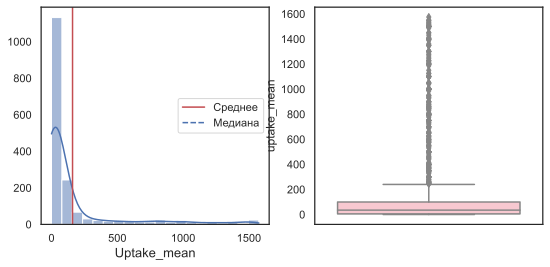

In [26]:
graph_histplot_bin(df, 'uptake_mean')

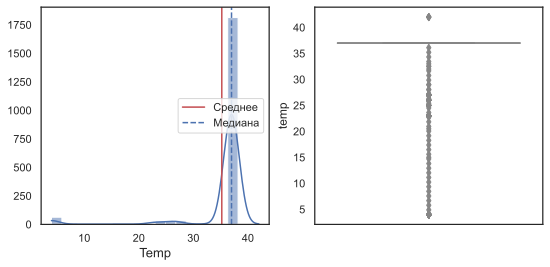

In [44]:
graph_histplot_bin(df, 'temp')

<AxesSubplot:xlabel='temp', ylabel='uptake_mean'>

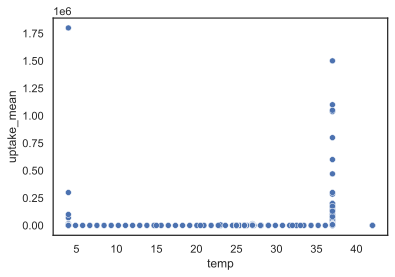

In [45]:
sns.scatterplot(data=df, x='temp', y='uptake_mean')

--- 
## Добавление доп. колонок

In [49]:
!pip install molmass

In [27]:
from molmass import Formula

def get_mass(x):
    try:
        return Formula(x.upper()).mass
    except Exception:
        return np.nan

df['weight'] = df.sequence.apply(lambda x: get_mass(x))
df.head()

,peptide,cellline,cargo,pubmedid,uptake,units,conc,time,temp,method,type,sequence,uptake_mean,uptake_error,weight
0,Tat (49-57),Jurkat cells,Fluorescein,11087855,650,Mean Fluorescence intensity,12.5 uM,15.0,23.0,Flow cytometry,Cellular uptake,RKKRRQRRR,650.00,0.0,1339.605511
1,Tat (49-56),Jurkat cells,Fluorescein,11087855,31.25,Mean Fluorescence intensity,12.5 uM,10.0,23.0,Flow cytometry,Cellular uptake,RKKRRQRR,31.25,0.0,1183.419562
2,Tat (49-55),Jurkat cells,Fluorescein,11087855,10,Mean Fluorescence intensity,12.5 uM,10.0,23.0,Flow cytometry,Cellular uptake,RKKRRQR,10.00,0.0,1027.233613
3,Tat (50-57),Jurkat cells,Fluorescein,11087855,22.5,Mean Fluorescence intensity,12.5 uM,10.0,23.0,Flow cytometry,Cellular uptake,KKRRQRRR,22.50,0.0,1183.419562
4,Tat (51-57),Jurkat cells,Fluorescein,11087855,20,Mean Fluorescence intensity,12.5 uM,10.0,23.0,Flow cytometry,Cellular uptake,KRRQRRR,20.00,0.0,1055.247019


In [28]:
df.weight.isna().sum()

386

Добавим бинарную колонку CPP.

Experimental.txt and Experimental2.txt

Contain more sequences of CPPs with experimentally proved activity in .txt format.

In [52]:
# Установка библиотек
!pip install biopython

In [29]:
df.head()

,peptide,cellline,cargo,pubmedid,uptake,units,conc,time,temp,method,type,sequence,uptake_mean,uptake_error,weight
0,Tat (49-57),Jurkat cells,Fluorescein,11087855,650,Mean Fluorescence intensity,12.5 uM,15.0,23.0,Flow cytometry,Cellular uptake,RKKRRQRRR,650.00,0.0,1339.605511
1,Tat (49-56),Jurkat cells,Fluorescein,11087855,31.25,Mean Fluorescence intensity,12.5 uM,10.0,23.0,Flow cytometry,Cellular uptake,RKKRRQRR,31.25,0.0,1183.419562
2,Tat (49-55),Jurkat cells,Fluorescein,11087855,10,Mean Fluorescence intensity,12.5 uM,10.0,23.0,Flow cytometry,Cellular uptake,RKKRRQR,10.00,0.0,1027.233613
3,Tat (50-57),Jurkat cells,Fluorescein,11087855,22.5,Mean Fluorescence intensity,12.5 uM,10.0,23.0,Flow cytometry,Cellular uptake,KKRRQRRR,22.50,0.0,1183.419562
4,Tat (51-57),Jurkat cells,Fluorescein,11087855,20,Mean Fluorescence intensity,12.5 uM,10.0,23.0,Flow cytometry,Cellular uptake,KRRQRRR,20.00,0.0,1055.247019


In [30]:
#  Учитывая, что Х - неизвестная, значение которой не указано, уберем его из последовательности
df.sequence = df.sequence.str.replace('X', '')

In [31]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.SeqUtils import gc_fraction

cpp = []

for record in SeqIO.parse(PATH + "Natural CPPs/CPPBase.fasta", "fasta"):
    cpp.append(str(record.seq))


with open(PATH + "Natural CPPs/Experimental.txt") as f:
    cpp.extend([i.strip() for i in f.readlines()])

with open(PATH + "Natural CPPs/Experimental2.txt") as f:
    cpp.extend([i.strip() for i in f.readlines()])

with open(PATH + "Natural CPPs/Experimental_high_uptake.txt") as f:
    cpp.extend([i.strip() for i in f.readlines()])

cpp = set(cpp)
df['cpp'] = np.nan * df.shape[0]

for i, seq in enumerate(df.sequence):
    if seq in cpp:
        df.at[i, 'cpp'] = 1

df.cpp.sum()

753.0

In [32]:
df.dropna(subset=['peptide'], inplace=True)

In [52]:
df.head()

,peptide,cellline,cargo,pubmedid,uptake,units,conc,time,temp,method,type,sequence,uptake_mean,uptake_error,weight,cpp
0,Tat (49-57),Jurkat cells,Fluorescein,11087855,650,Mean Fluorescence intensity,12.5 uM,15.0,23.0,Flow cytometry,Cellular uptake,RKKRRQRRR,650.00,0.0,1339.605511,1.0
1,Tat (49-56),Jurkat cells,Fluorescein,11087855,31.25,Mean Fluorescence intensity,12.5 uM,10.0,23.0,Flow cytometry,Cellular uptake,RKKRRQRR,31.25,0.0,1183.419562,1.0
2,Tat (49-55),Jurkat cells,Fluorescein,11087855,10,Mean Fluorescence intensity,12.5 uM,10.0,23.0,Flow cytometry,Cellular uptake,RKKRRQR,10.00,0.0,1027.233613,1.0
3,Tat (50-57),Jurkat cells,Fluorescein,11087855,22.5,Mean Fluorescence intensity,12.5 uM,10.0,23.0,Flow cytometry,Cellular uptake,KKRRQRRR,22.50,0.0,1183.419562,1.0
4,Tat (51-57),Jurkat cells,Fluorescein,11087855,20,Mean Fluorescence intensity,12.5 uM,10.0,23.0,Flow cytometry,Cellular uptake,KRRQRRR,20.00,0.0,1055.247019,1.0


In [33]:
not_cpp = []

with open(PATH + "Non-CPPs\Experimental.txt") as f:
    not_cpp.extend([i.strip() for i in f.readlines()])

with open(PATH + "Non-CPPs\Generated.txt") as f:
    not_cpp.extend([i.strip() for i in f.readlines()])

not_cpp = set(not_cpp)

for i, seq in enumerate(df.sequence):
    if seq in not_cpp:
        df.at[i, 'cpp'] = 0

df.head()

,peptide,cellline,cargo,pubmedid,uptake,units,conc,time,temp,method,type,sequence,uptake_mean,uptake_error,weight,cpp
0,Tat (49-57),Jurkat cells,Fluorescein,11087855.0,650,Mean Fluorescence intensity,12.5 uM,15.0,23.0,Flow cytometry,Cellular uptake,RKKRRQRRR,650.00,0.0,1339.605511,1.0
1,Tat (49-56),Jurkat cells,Fluorescein,11087855.0,31.25,Mean Fluorescence intensity,12.5 uM,10.0,23.0,Flow cytometry,Cellular uptake,RKKRRQRR,31.25,0.0,1183.419562,1.0
2,Tat (49-55),Jurkat cells,Fluorescein,11087855.0,10,Mean Fluorescence intensity,12.5 uM,10.0,23.0,Flow cytometry,Cellular uptake,RKKRRQR,10.00,0.0,1027.233613,1.0
3,Tat (50-57),Jurkat cells,Fluorescein,11087855.0,22.5,Mean Fluorescence intensity,12.5 uM,10.0,23.0,Flow cytometry,Cellular uptake,KKRRQRRR,22.50,0.0,1183.419562,1.0
4,Tat (51-57),Jurkat cells,Fluorescein,11087855.0,20,Mean Fluorescence intensity,12.5 uM,10.0,23.0,Flow cytometry,Cellular uptake,KRRQRRR,20.00,0.0,1055.247019,1.0


In [34]:
df['cpp'].unique()

array([ 1., nan,  0.])

In [55]:
df.cpp.isna().sum()

1144

Заполнили всего ~700 значений.

In [61]:
!pip install pybiomed

In [35]:
df.isna().sum()

peptide            1
cellline           1
cargo              1
pubmedid           1
uptake             4
units             32
conc             156
time               1
temp               1
method             1
type               1
sequence           1
uptake_mean        4
uptake_error       1
weight           387
cpp             1022
dtype: int64

In [36]:
# Удалим модифицированные последовательности
df.dropna(subset=['weight'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [37]:
des = {
        'BalabanJ': 0,
        'BertzCT': 0,
        'HeavyAtomCount': 0,
        'Ipc': 0,
        'LabuteASA': 0,
        'MolLogP': 0,
        'MolMR': 0,
        'MolWt': 0,
        'NHOHCount': 0,
        'NOCount': 0,
        'RingCount': 0,
        'TPSA': 0,
        'qed': 0

    }

for i in des.keys():
    df[i] = np.nan * df.shape[0]

In [39]:
import rdkit
from rdkit import Chem
from rdkit.Chem import Descriptors



def get_descriptor(sequence):
    mol = Chem.MolFromSequence(sequence)
    des = {
        'BalabanJ': 0,
        'BertzCT': 0,
        'HeavyAtomCount': 0,
        'Ipc': 0,
        'LabuteASA': 0,
        'MolLogP': 0,
        'MolMR': 0,
        'MolWt': 0,
        'NHOHCount': 0,
        'NOCount': 0,
        'RingCount': 0,
        'TPSA': 0,
        'qed': 0

    }
    # Get a list of all available descriptor functions
    descriptor_functions = [func for func in dir(Descriptors) if callable(getattr(Descriptors, func))]

    for descriptor_name in descriptor_functions:
        try:
            if descriptor_name in des.keys():
                # Call the descriptor function and print its name and value
                descriptor_value = getattr(Descriptors, descriptor_name)(mol)
                #print(f"{descriptor_name}: {descriptor_value}")
                des[descriptor_name] = descriptor_value
        except:
            # Handle potential errors (e.g., if a descriptor is not applicable to the molecule)
            print(f"{descriptor_name}: Error calculating descriptor.") 

    return des


In [40]:

new_columns = []
for i in df.sequence: 
    new_columns.append(get_descriptor(i))

# Добавление новых колонок в датафрейм
for num, x in enumerate(new_columns):
  for column_name, column_data in x.items():
    df.loc[num, column_name] = column_data

df.head()

c:\Users\lolol\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:1711: RuntimeWarning: overflow encountered in reduce
  return asanyarray(a).trace(offset=offset, axis1=axis1, axis2=axis2, dtype=dtype, out=out)
c:\Users\lolol\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:1711: RuntimeWarning: invalid value encountered in reduce
  return asanyarray(a).trace(offset=offset, axis1=axis1, axis2=axis2, dtype=dtype, out=out)
c:\Users\lolol\anaconda3\lib\site-packages\rdkit\Chem\Graphs.py:47: RuntimeWarning: invalid value encountered in multiply
  Bn = An - res[n] * I
c:\Users\lolol\anaconda3\lib\site-packages\rdkit\Chem\Graphs.py:47: RuntimeWarning: invalid value encountered in subtract
  Bn = An - res[n] * I


,peptide,cellline,cargo,pubmedid,uptake,units,conc,time,temp,method,...,Ipc,LabuteASA,MolLogP,MolMR,MolWt,NHOHCount,NOCount,RingCount,TPSA,qed
0,Tat (49-57),Jurkat cells,Fluorescein,11087855.0,650,Mean Fluorescence intensity,12.5 uM,15.0,23.0,Flow cytometry,...,3.768764e+20,545.334779,-9.62018,350.2008,1339.630,41.0,41.0,0.0,762.65,0.015274
1,Tat (49-56),Jurkat cells,Fluorescein,11087855.0,31.25,Mean Fluorescence intensity,12.5 uM,10.0,23.0,Flow cytometry,...,5.267459e+16,481.858638,-8.36825,309.1193,1183.441,36.0,36.0,0.0,671.65,0.015288
2,Tat (49-55),Jurkat cells,Fluorescein,11087855.0,10,Mean Fluorescence intensity,12.5 uM,10.0,23.0,Flow cytometry,...,3.462691e+14,418.382498,-7.11632,268.0378,1027.252,31.0,31.0,0.0,580.65,0.015402
3,Tat (50-57),Jurkat cells,Fluorescein,11087855.0,22.5,Mean Fluorescence intensity,12.5 uM,10.0,23.0,Flow cytometry,...,5.545018e+16,481.858638,-8.36825,309.1193,1183.441,36.0,36.0,0.0,671.65,0.015288
4,Tat (51-57),Jurkat cells,Fluorescein,11087855.0,20,Mean Fluorescence intensity,12.5 uM,10.0,23.0,Flow cytometry,...,7.771524e+14,428.617711,-7.98205,274.2832,1055.266,33.0,33.0,0.0,616.53,0.015393


In [42]:
df.isna().sum()

peptide             0
cellline            0
cargo               0
pubmedid            0
uptake              3
units              23
conc               88
time                0
temp                0
method              0
type                0
sequence            0
uptake_mean         3
uptake_error        0
weight              0
cpp               741
BalabanJ            0
BertzCT             0
HeavyAtomCount      0
Ipc                12
LabuteASA           0
MolLogP             0
MolMR               0
MolWt               0
NHOHCount           0
NOCount             0
RingCount           0
TPSA                0
qed                 0
dtype: int64

In [142]:
df = pd.read_csv('new_df2.csv') 
df.columns = [col.lower().replace(' ', '') for col in df.columns]
df.drop(['pubmedid', 'uptake'], axis=1, inplace=True)
df.head()

,peptide,cellline,cargo,units,conc,time,temp,method,type,sequence,...,ipc,labuteasa,mollogp,molmr,molwt,nhohcount,nocount,ringcount,tpsa,qed
0,Tat (49-57),Jurkat cells,Fluorescein,Mean Fluorescence intensity,12.5 uM,15.0,23.0,Flow cytometry,Cellular uptake,RKKRRQRRR,...,3.768764e+20,545.334779,-9.62018,350.2008,1339.630,41.0,41.0,0.0,762.65,0.015274
1,Tat (49-56),Jurkat cells,Fluorescein,Mean Fluorescence intensity,12.5 uM,10.0,23.0,Flow cytometry,Cellular uptake,RKKRRQRR,...,5.267459e+16,481.858638,-8.36825,309.1193,1183.441,36.0,36.0,0.0,671.65,0.015288
2,Tat (49-55),Jurkat cells,Fluorescein,Mean Fluorescence intensity,12.5 uM,10.0,23.0,Flow cytometry,Cellular uptake,RKKRRQR,...,3.462691e+14,418.382498,-7.11632,268.0378,1027.252,31.0,31.0,0.0,580.65,0.015402
3,Tat (50-57),Jurkat cells,Fluorescein,Mean Fluorescence intensity,12.5 uM,10.0,23.0,Flow cytometry,Cellular uptake,KKRRQRRR,...,5.545018e+16,481.858638,-8.36825,309.1193,1183.441,36.0,36.0,0.0,671.65,0.015288
4,Tat (51-57),Jurkat cells,Fluorescein,Mean Fluorescence intensity,12.5 uM,10.0,23.0,Flow cytometry,Cellular uptake,KRRQRRR,...,7.771524e+14,428.617711,-7.98205,274.2832,1055.266,33.0,33.0,0.0,616.53,0.015393


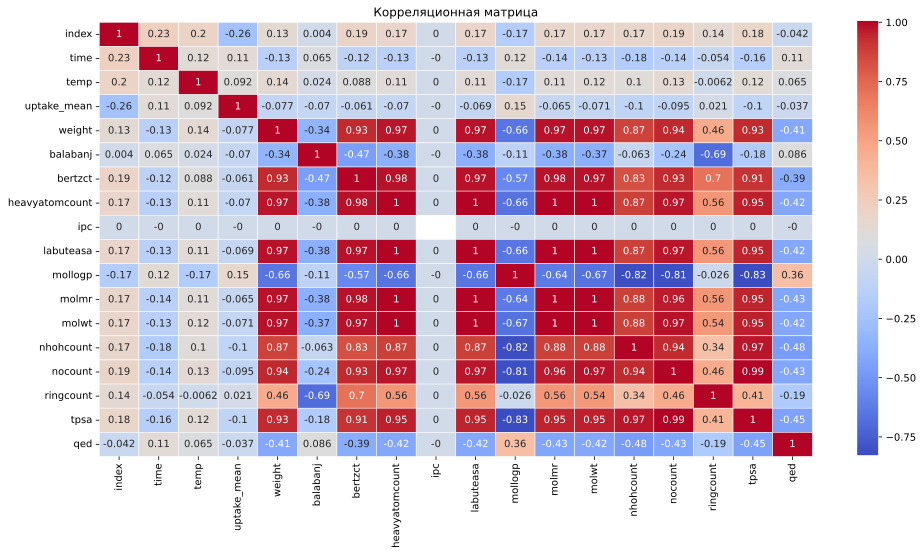

In [39]:
df_corr = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = df_corr.corr()

plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()

## 1. Sequence classification

In [145]:
df.cpp.fillna(value=0, inplace=True)

In [148]:
df.cpp.value_counts()

0.0    744
1.0    577
Name: cpp, dtype: int64

In [149]:
df.dropna(subset='cpp', inplace=True)
df = df.dropna()
df.reset_index(drop=True, inplace=True)

In [150]:
from sklearn.preprocessing import MinMaxScaler

df_cpp = df.cpp
df.drop(['peptide', 'cargo', 'cellline', 'uptake_error', 'cpp', 'labuteasa', 'mollogp', 'qed',
                     'units', 'conc', 'type', 'sequence', 'method'], inplace=True, axis=1)

df = df.dropna()
df.reset_index(inplace=True, drop=True)

scaler = MinMaxScaler()

scaler.fit(df)

scaled_data = scaler.transform(df)

original_data = scaler.inverse_transform(scaled_data)

scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
# Разделение данных на признаки и целевую переменную
X = scaled_df
y = df_cpp

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [152]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [153]:
# Построение и обучение модели Random Forest
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler()),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [154]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', MinMaxScaler()),
                ('classifier', RandomForestClassifier(random_state=42))])

In [155]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Получаем предсказания
y_pred = pipeline.predict(X_test)

# Вычисляем и выводим точность
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Вычисляем и выводим precision, recall и F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

              precision    recall  f1-score   support

         0.0       0.79      0.87      0.83       199
         1.0       0.82      0.72      0.77       165

    accuracy                           0.80       364
   macro avg       0.81      0.80      0.80       364
weighted avg       0.80      0.80      0.80       364

Accuracy: 0.8021978021978022
Precision: 0.8038865558941138
Recall: 0.8021978021978022
F1-score: 0.8005491961349347


Итого, **мы обучили модель на основе метода случайного леса, и добились хороших метрик.**

Accuracy: **0.8023**

Precision: **0.8039**

Recall: **0.8022**

F1-score: **0.8005**
